# Лабораторная 5

Создать 3 датасета с "Качественными данными" на которой можно обучить простую модель регресии

Импорт библиотек

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Создание датасетов

Датасет 1: Линейные данные

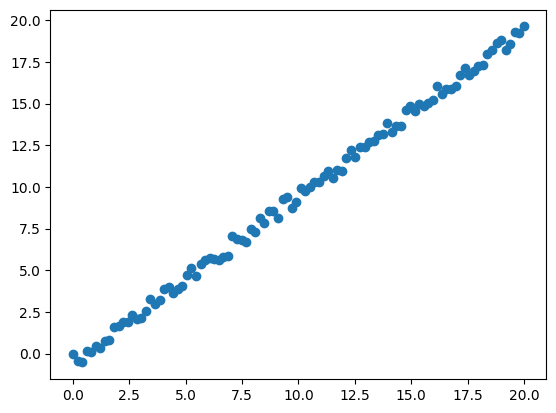

In [73]:
X1 = np.linspace(0, 20, 100)
y1 = X1 + np.random.random(100) - 1

plt.scatter(X1, y1)
plt.show()

Датасет 2: Линейные данные

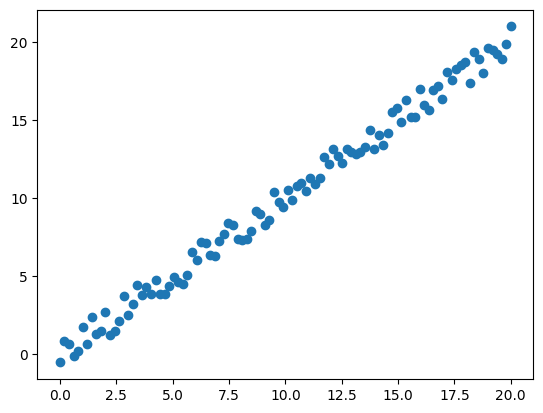

In [74]:
X2 = np.linspace(0, 20, 100)
y2 = X2 + np.random.random(100)*2 - 1
    
plt.scatter(X2, y2)
plt.show()

Датасет 3: Линейные данные с небольшим шумом

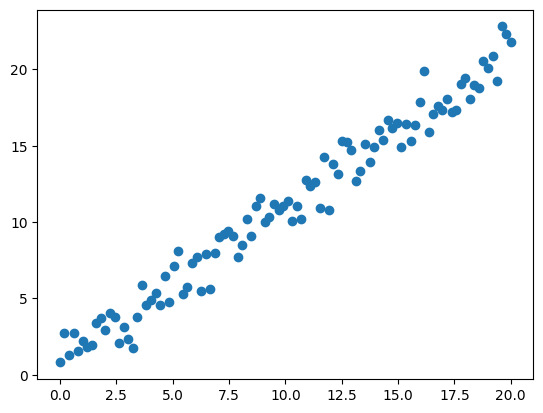

In [75]:
X3 = np.linspace(0, 20, 100).reshape(-1, 1)
y3 = X3 + 1 + np.random.normal(scale=1, size=X3.shape)
    
plt.scatter(X3, y3)
plt.show()

Датасет 4: Линейные данные с сильным шумом

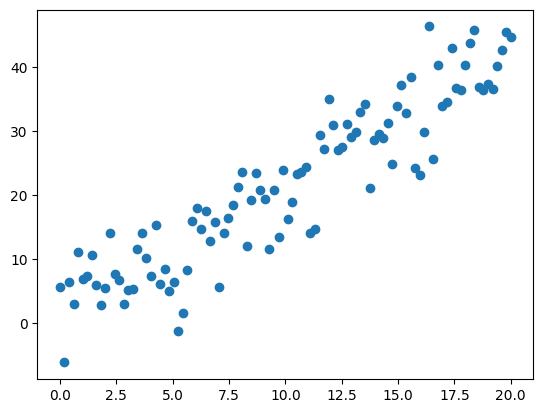

In [76]:
X4 = np.linspace(0, 20, 100).reshape(-1, 1)
y4 = 2 * X4 + 1 + np.random.normal(scale=5, size=X4.shape)

plt.scatter(X4, y4)
plt.show()

Тренируем модель

In [77]:
X_train = X1.reshape(-1, 1)
y_train = y1

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Проверка предсказания

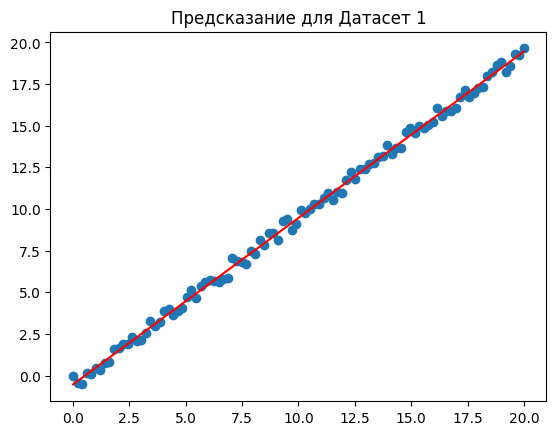

MSE: 0.08
R2: 1.00



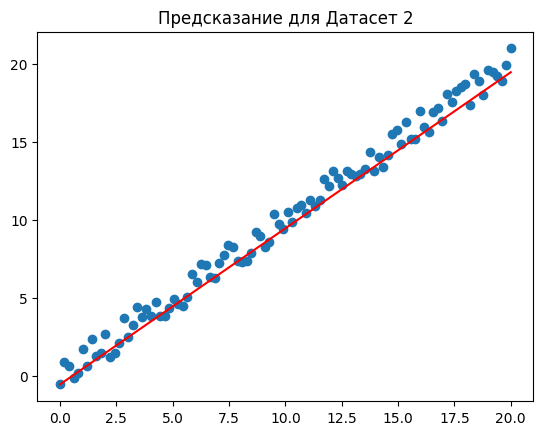

MSE: 0.67
R2: 0.98



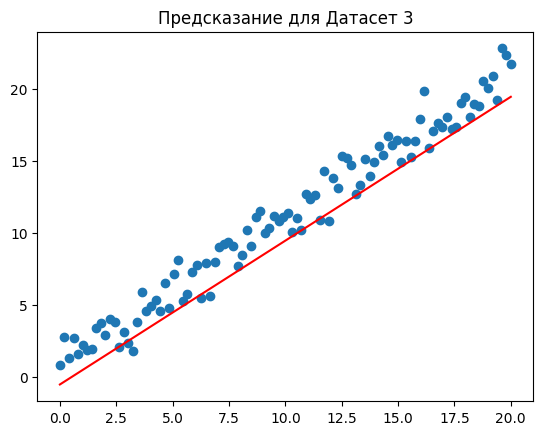

MSE: 3.49
R2: 0.90



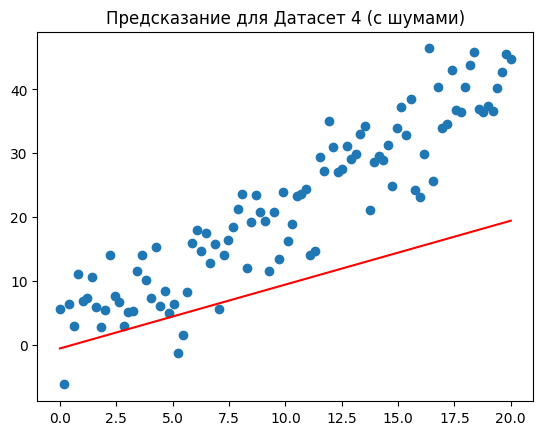

MSE: 207.77
R2: -0.25



In [78]:
def get_predictions(x, y, dataset_name, id):
    y_pred = model.predict(x.reshape(-1, 1))

    plt.scatter(x, y)
    plt.plot(x.reshape(-1, 1), y_pred, color="red")
    plt.title(f"Предсказание для {dataset_name}")
    plt.show()

    print(f"MSE: %.2f" % mean_squared_error(y, y_pred))
    print(f"R2: %.2f" % r2_score(y, y_pred))
    print()

get_predictions(X1, y1, "Датасет 1", 1)
get_predictions(X2, y2, "Датасет 2", 2)
get_predictions(X3, y3, "Датасет 3", 3)
get_predictions(X4, y4, "Датасет 4 (с шумами)", 4)

# Тестирование

In [79]:
import ipytest


def test_model_on_x1():
    predictions = model.predict(X1.reshape(-1, 1))
    mse = mean_squared_error(y1, predictions)
    print("MSE on Clean Data:", mse)
    assert mse < 1 # Проверяем, что MSE меньше 1

def test_model_on_x2():
    predictions = model.predict(X2.reshape(-1, 1))
    mse = mean_squared_error(y2, predictions)
    print("MSE on Clean Data:", mse)
    assert mse < 1 # Проверяем, что MSE меньше 1

def test_model_on_x3():
    predictions = model.predict(X3.reshape(-1, 1))
    mse = mean_squared_error(y3, predictions)
    print("MSE on Clean Data:", mse)
    assert mse < 1 # Проверяем, что MSE меньше 1

def test_model_on_x4():
    predictions = model.predict(X4.reshape(-1, 1))
    mse = mean_squared_error(y4, predictions)
    print(mse)
    assert mse < 1 # Проверяем, что MSE меньше 1

ipytest.run('-v')

======================================= test session starts =======================================
platform win32 -- Python 3.10.11, pytest-8.2.0, pluggy-1.5.0 -- d:\Project\Study\MLOps\MLOPS\.venv\Scripts\python.exe
cachedir: .pytest_cache
rootdir: d:\Project\Study\MLOps\MLOPS\lab5
plugins: hydra-core-1.3.2
collecting ... collected 4 items

t_b292f5e24bd34bd49684d9c70bca11ba.py::test_model_on_x1 PASSED                               [ 25%]
t_b292f5e24bd34bd49684d9c70bca11ba.py::test_model_on_x2 PASSED                               [ 50%]
t_b292f5e24bd34bd49684d9c70bca11ba.py::test_model_on_x3 FAILED                               [ 75%]
t_b292f5e24bd34bd49684d9c70bca11ba.py::test_model_on_x4 FAILED                               [100%]

============================================ FAILURES =============================================
________________________________________ test_model_on_x3 _________________________________________

    def test_model_on_x3():
        predictions = mod

<ExitCode.TESTS_FAILED: 1>

# Выводы

Мы создали датасеты с "качественными" синтетическими данными, на самых лучших данных обучили модель линейной регресии. Сделали автоматический тест модели на разных датасетах. Как мы видим датасеты с шумами не прошли тестирование.